In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.1


In [4]:
# Example: the Dense layer has 2 parameters: the number of units and the activation function

layer = keras.layers.Dense(3)
layer.build((None, 4))  # Create the weights for the layer

print("weights:", layer.get_weights())
print("Trainable weights:", layer.trainable_weights)
print("Non-trainable weights:", layer.non_trainable_weights)

weights: [array([[-0.73071426, -0.26080936,  0.14272487],
       [ 0.78723836,  0.702019  , -0.47562182],
       [ 0.9229338 ,  0.07323623,  0.4065932 ],
       [-0.56617916,  0.73369944, -0.04798508]], dtype=float32), array([0., 0., 0.], dtype=float32)]
Trainable weights: [<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[-0.73071426, -0.26080936,  0.14272487],
       [ 0.78723836,  0.702019  , -0.47562182],
       [ 0.9229338 ,  0.07323623,  0.4065932 ],
       [-0.56617916,  0.73369944, -0.04798508]], dtype=float32)>, <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]
Non-trainable weights: []


2026-02-24 10:46:25.558709: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2026-02-24 10:46:25.654330: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2026-02-24 10:46:25.654617: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [5]:
# Example: the BatchNormalization layer has 4 parameters: the momentum, the epsilon, the center and the scale

layer = keras.layers.BatchNormalization()
layer.build((None, 4))  # Create the weights for the layer

print("weights:", layer.get_weights())
print("Trainable weights:", layer.trainable_weights)
print("Non-trainable weights:", layer.non_trainable_weights)

weights: [array([1., 1., 1., 1.], dtype=float32), array([0., 0., 0., 0.], dtype=float32), array([0., 0., 0., 0.], dtype=float32), array([1., 1., 1., 1.], dtype=float32)]
Trainable weights: [<tf.Variable 'gamma:0' shape=(4,) dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>, <tf.Variable 'beta:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]
Non-trainable weights: [<tf.Variable 'moving_mean:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>, <tf.Variable 'moving_variance:0' shape=(4,) dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>]


In [6]:
# Example: setting the trainable attribute of a layer to False

layer = keras.layers.Dense(3)
layer.build((None, 4))  # Create the weights for the layer
layer.trainable = False  # Set the layer to be non-trainable

print("weights:", layer.get_weights())
print("Trainable weights:", layer.trainable_weights)
print("Non-trainable weights:", layer.non_trainable_weights)

weights: [array([[ 0.18434763,  0.6929138 ,  0.37292325],
       [-0.4596315 , -0.8562679 , -0.24947655],
       [ 0.22029746,  0.31272483,  0.8525963 ],
       [-0.7116637 ,  0.19524801, -0.44340634]], dtype=float32), array([0., 0., 0.], dtype=float32)]
Trainable weights: []
Non-trainable weights: [<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.18434763,  0.6929138 ,  0.37292325],
       [-0.4596315 , -0.8562679 , -0.24947655],
       [ 0.22029746,  0.31272483,  0.8525963 ],
       [-0.7116637 ,  0.19524801, -0.44340634]], dtype=float32)>, <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]


In [7]:
# When a trainable layer is set to non-trainable, its weights are moved from the trainable_weights list to the non_trainable_weights list. 
# This means that the weights of the layer will not be updated during training, and they will not contribute to the loss function.
# Make a model with 2 Layers, one trainable and one non-trainable
input = keras.Input(shape=(3,))
layer1 = keras.layers.Dense(3, activation="relu")
layer2 = keras.layers.Dense(3, activation="sigmoid")

model = keras.Sequential([input, layer1, layer2])

# Freeze the first layer
layer1.trainable = False

# Get the initial weights of the first layer
initial_layer1_weights_values = layer1.get_weights()

# Train the model
model.compile(optimizer="adam", loss="mse")
model.fit(np.random.rand(10, 3), np.random.rand(10, 3))

# Check that the weight of layer1 have not changed during training
final_layer1_weights_values = layer1.get_weights()

np.testing.assert_allclose(
    initial_layer1_weights_values[0], final_layer1_weights_values[0]
)

np.testing.assert_allclose(
    initial_layer1_weights_values[1], final_layer1_weights_values[1]
)

2026-02-24 10:46:30.222288: I external/local_xla/xla/service/service.cc:168] XLA service 0x749614cd3230 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-02-24 10:46:30.222310: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1050 Ti, Compute Capability 6.1
2026-02-24 10:46:30.231909: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-02-24 10:46:30.254681: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1771947990.340643 1487917 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 1s 1s/step - loss: 0.0703


In [8]:
# Rescursive setting of the trainable attribute of a layer to False

inner_model = keras.Sequential(
    [
        keras.Input(shape=(3,)),
        keras.layers.Dense(3, activation="relu"),
        keras.layers.Dense(3, activation="relu"),
    ]
)

model = keras.Sequential(
    [keras.Input(shape=(3,)), inner_model, keras.layers.Dense(3, activation="sigmoid")]
)

model.trainable = False  # Set the entire model to be non-trainable

assert inner_model.trainable == False # All layers in `model` are now frozen
assert inner_model.layers[0].trainable == False # `trainable` is propagated recursively

print("All layers in the model are non-trainable.")
print("The weights of the layers will not be updated during training.")

All layers in the model are non-trainable.
The weights of the layers will not be updated during training.


In [9]:
import tensorflow_datasets as tfds

tfds.disable_progress_bar()  # Disable the progress bar for loading datasets

train_ds, validation_ds, test_ds = tfds.load(
    "cats_vs_dogs",
    # Reserver 10% of the data for validation and 10% for testing
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True, # Include labels in the dataset
)

print("Number of training samples: $d" % tf.data.experimental.cardinality(train_ds))
print("Number of validation samples: $d" % tf.data.experimental.cardinality(validation_ds))
print("Number of test samples: $d" % tf.data.experimental.cardinality(test_ds))

Number of training samples: $d
Number of validation samples: $d
Number of test samples: $d


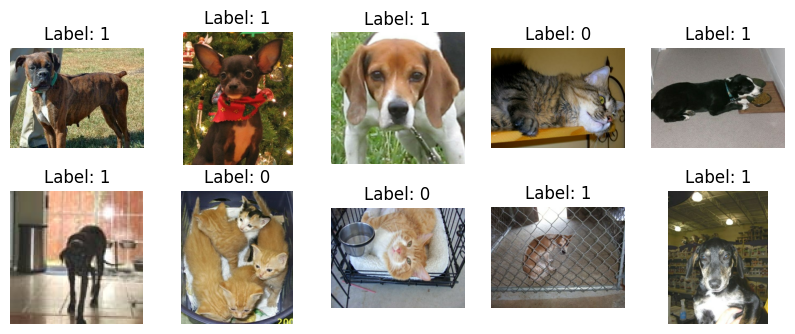

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(10)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title("Label: %d" % label.numpy())
    plt.axis("off")

In [11]:
# Standardize the data

size = (150, 150)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

print("Data has been standardized to size: %s" % str(size))
print("Train dataset:", train_ds)
print("Validation dataset:", validation_ds)
print("Test dataset:", test_ds)

Data has been standardized to size: (150, 150)
Train dataset: <_MapDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
Validation dataset: <_MapDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
Test dataset: <_MapDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [12]:
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

print("Data has been batched with batch size: %d" % batch_size)
print("Train dataset:", train_ds)
print("Validation dataset:", validation_ds)
print("Test dataset:", test_ds)

Data has been batched with batch size: 32
Train dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
Validation dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
Test dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [13]:
# Using Random Data Augmentation

from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

2026-02-24 10:46:40.153148: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


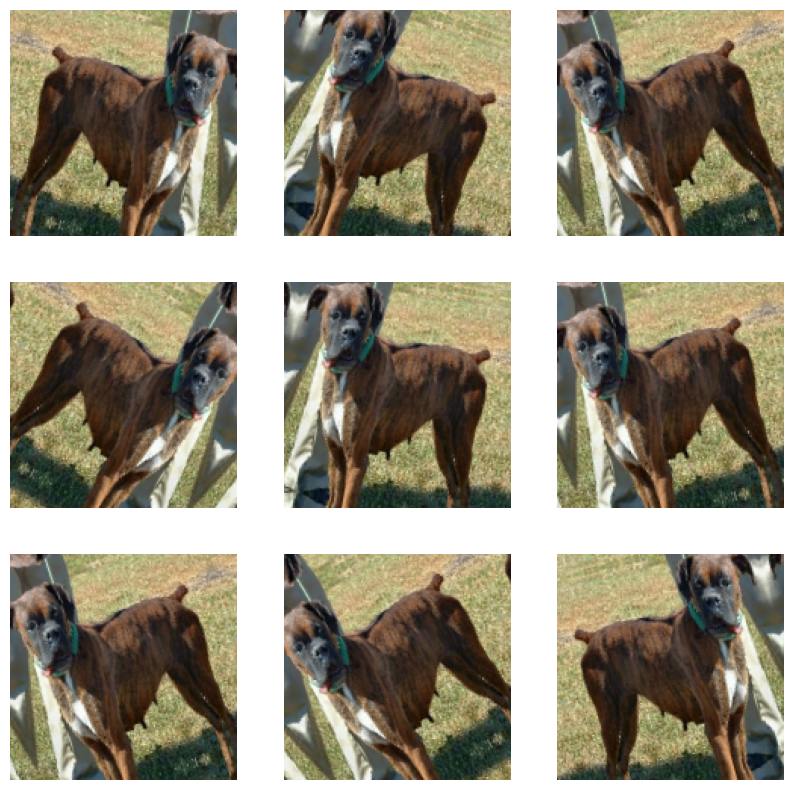

In [14]:
for image, label in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.axis("off")

In [15]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False,  # Do not include the ImageNet classifier at the top.
)

base_model.trainable = False  # Freeze the base model

# Create a new model on top of the output of one (or several) layers from the base model
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)  # Apply data augmentation to the input images

# Pre-trained Xception weights are normalized with the Rescaling layer
# from (0, 255) to the range of (-1, 1), the  rescaling layer.
scale_layer = keras.layers.Rescaling(1 / 127.5, offset=-1)
x = scale_layer(x)
print("Input shape after rescaling:", x.shape)

# The base model contains batch normalization layers. We make sure that the batch normalization layers are in inference mode, so that the statistics stored in the batch normalization layers are not updated during training.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.summary()

Input shape after rescaling: (None, 150, 150, 3)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
            

In [16]:
# Train the model
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 10
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

Epoch 1/10


/home/dev-algo/anaconda3/envs/WLV-TF/lib/python3.10/site-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
2026-02-24 10:46:51.954619: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.50GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2026-02-24 10:46:52.140972: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.50GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


290/291 [============================>.] - ETA: 0s - loss: 0.1762 - binary_accuracy: 0.9246

2026-02-24 10:47:33.479641: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2026-02-24 10:47:33.634650: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.46GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


291/291 [==============================] - ETA: 0s - loss: 0.1761 - binary_accuracy: 0.9247

2026-02-24 10:47:45.700339: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.44GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2026-02-24 10:47:45.839909: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.44GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


291/291 [==============================] - 59s 181ms/step - loss: 0.1761 - binary_accuracy: 0.9247 - val_loss: 0.0853 - val_binary_accuracy: 0.9708
Epoch 2/10
291/291 [==============================] - 46s 158ms/step - loss: 0.1232 - binary_accuracy: 0.9482 - val_loss: 0.0826 - val_binary_accuracy: 0.9673
Epoch 3/10
291/291 [==============================] - 46s 158ms/step - loss: 0.1098 - binary_accuracy: 0.9544 - val_loss: 0.0824 - val_binary_accuracy: 0.9678
Epoch 4/10
291/291 [==============================] - 46s 158ms/step - loss: 0.1059 - binary_accuracy: 0.9569 - val_loss: 0.0740 - val_binary_accuracy: 0.9712
Epoch 5/10
291/291 [==============================] - 46s 158ms/step - loss: 0.1052 - binary_accuracy: 0.9580 - val_loss: 0.0744 - val_binary_accuracy: 0.9708
Epoch 6/10
291/291 [==============================] - 46s 158ms/step - loss: 0.0983 - binary_accuracy: 0.9620 - val_loss: 0.0726 - val_binary_accuracy: 0.9699
Epoch 7/10
291/291 [==============================] - 46s

In [17]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_ds)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

 1/73 [..............................] - ETA: 16s - loss: 0.0605 - binary_accuracy: 0.9375

2026-02-24 10:54:45.249881: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 86402560 bytes after encountering the first element of size 8640256 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


73/73 [==============================] - 9s 125ms/step - loss: 0.0756 - binary_accuracy: 0.9716
Test accuracy: 0.9716250896453857
Test loss: 0.07558993250131607


1/1 [==============================] - 0s 26ms/step
Predictions: [[1.8881132e-04]
 [9.9870932e-01]
 [9.9901128e-01]
 [9.9940062e-01]
 [4.8082104e-01]
 [8.9393419e-01]
 [9.2411005e-01]
 [9.9970394e-01]
 [2.2932120e-04]
 [9.8734123e-01]
 [6.1404973e-01]
 [9.9840492e-01]
 [3.3139583e-04]
 [7.2554126e-06]
 [3.4492488e-05]
 [9.9614656e-01]
 [8.1011276e-05]
 [9.9818265e-01]
 [9.0102904e-04]
 [9.9128258e-01]
 [9.9989736e-01]
 [9.8307312e-01]
 [3.8982864e-05]
 [2.4224666e-03]
 [2.2560800e-05]
 [5.8449170e-04]
 [9.9990571e-01]
 [1.7785742e-05]
 [1.2111138e-05]
 [7.0152670e-04]
 [9.9387336e-01]
 [9.9953973e-01]]
Labels: [0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1]


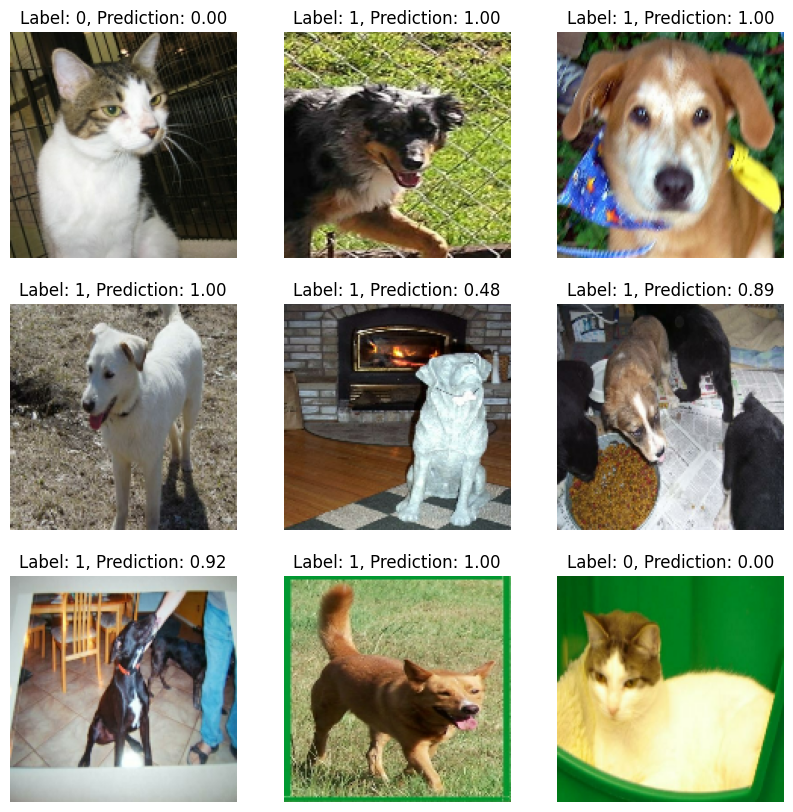

In [20]:
# Generate a Test Predictions with labels

for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    print("Predictions:", predictions)
    print("Labels:", labels.numpy())
    
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title("Label: %d, Prediction: %.2f" % (labels[i].numpy(), predictions[i][0]))
    plt.axis("off")